<a href="https://colab.research.google.com/github/aslam7861/Machine_Learning_Project/blob/main/unsupervised_machinne_learnning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

In [18]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [125]:
#a data to 5000 songs
data_set_5000=pd.read_csv('https://raw.githubusercontent.com/aslam7861/Machine_Learning_Project/main/df_audio_features_5000')

In [126]:
#cleaning the data with space in columns name
col= data_set_5000.columns
data_set_5000.columns=[a.split()[0] for a in col]



In [43]:
datas=data_set_5000

In [36]:
data_set_5000.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

In [45]:
data_set_5000=data_set_5000[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

In [38]:
from math import pi

In [46]:
peng_cl_norm = MinMaxScaler().fit_transform(dd)#(data_set_5000)

In [47]:
# data_set_5000=pd.DataFrame(data_set_5000)[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

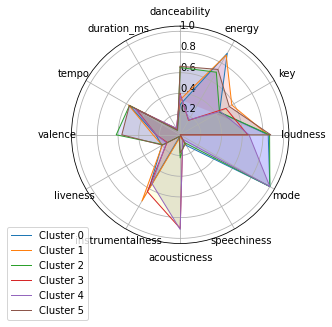

In [48]:
peng_cl_norm = MinMaxScaler().fit_transform(data_set_5000)
# Based on the quick look to the scatter plot, 
# we are going to assume there can be 3 different species.
kmeans = KMeans(n_clusters=6)
kmeans.fit(peng_cl_norm)

kmeans.cluster_centers_

cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
#cl_pos.columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness', 'instrumentalness', 'valence', 'tempo']
#cl_pos.columns = ['danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
cl_pos
# Set data
radar_df = cl_pos.reset_index().rename(columns={'index':'cluster'})
 
# ------- PART 1: Create background
 
# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(ticks=None, labels=None)
# plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=radar_df.loc[3].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 3")
ax.fill(angles, values, 'yellow', alpha=0.1)

# Ind5
values=radar_df.loc[4].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 4")
ax.fill(angles, values, 'black', alpha=0.1)
# Ind6
values=radar_df.loc[5].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 5")
ax.fill(angles, values, 'black', alpha=0.1)

# Ind7
#values=radar_df.loc[6].drop('cluster').values.flatten().tolist()
#values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 6")
#ax.fill(angles, values, 'cyan', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [51]:
def scalers_inertias(max_n_clusters, scalers, df):
  scalers_inertias = []
  for scaler in scalers:
    inertias = []
    for i in range(1, max_n_clusters):
      kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
      sc = scaler
      X = sc.fit_transform(df)
      y_kmeans = kmeans.fit_predict(X)
      inertias.append(kmeans.inertia_)
    scalers_inertias.append(inertias)
  return scalers_inertias

In [52]:
scalers=[StandardScaler(), MinMaxScaler(),  RobustScaler(),QuantileTransformer()]
inertias=scalers_inertias(10, scalers,data_set_5000)

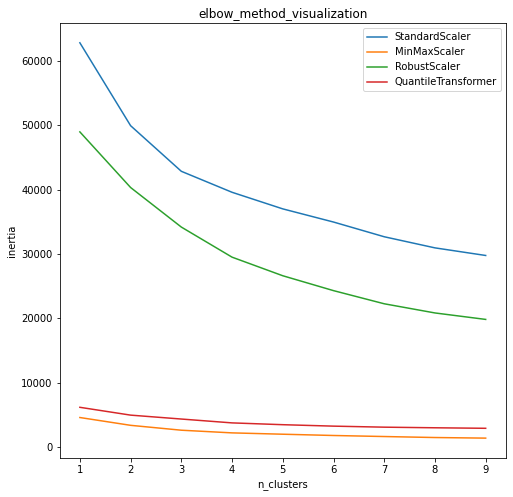

In [58]:
from IPython.core.pylabtools import figsize
def elbow_method_inertias(max_n_clusters, inertias, scalers):
    plt.subplots(figsize=(8,8))
    for i in range(len(scalers)):
       # plt.subplots(figsize=(6,6))
        plt.plot(range(1, max_n_clusters), inertias[i])
        #plt.plot(x=range(1,max_n_clusters), y=inertia)
    plt.title("elbow_method_visualization")
    plt.xlabel("n_clusters")
    plt.ylabel("inertia")
    plt.legend(str(scalers[i]).strip('()'))
    
    labels = []
    for scaler in scalers:
        labels.append(str(scaler).strip('()'))
    plt.legend(labels)
    plt.show()
elbow_method_inertias(10,inertias, scalers)

In [113]:
#This returns number of songs in each cluster together with totals songs
# and data frame of  updated dataset and cetroids
def selective_songs(max_n_cluster, df, features, num_songs, distance):
    # ciel_nums =num_songs#  int(np.ceil(num_songs/max_n_cluster))
    #df=df[features]
    df_f=df[features]
    df_norm=MinMaxScaler().fit_transform(df_f)
    kmeans=KMeans(n_clusters=4)
    kmeans.fit(df_norm)
    cl_pos= pd.DataFrame(kmeans.cluster_centers_)
    cl_pos.columns=df_f.columns
    df_f['cluster']=kmeans.labels_
    df['cluster']=kmeans.labels_
    cl_pos['cluster']= cl_pos.index
    dists=[]
    for i in range(df_f.shape[0]):
        cent = int(df_f.iloc[i]['cluster'])
        if distance == 'euclidean':
            dists.append(np.sqrt(  sum([a**2 for a in (df_f.iloc[i]-cl_pos.iloc[cent])] )))
        else:
            dists.append(np.sqrt(  sum([abs(a) for a in (df_f.iloc[i]-cl_pos.iloc[cent])] )))

    df_f['euc_dist']=dists
    df['euc_dist']=dists
    # songs=[]
    # for i in range(max_n_cluster):
    #     df_cluster=df.sort_values('euc_dist').groupby('cluster')
    #     songs.append(df_cluster[df_cluster['cluster']==i].head(num_songs) )
    songs=df.sort_values('euc_dist').groupby('cluster').head(num_songs)
    dfs = []
    for i in range(max_n_cluster):
        dfs.append(songs[songs['cluster']==i])
    #songs = select_df[:num_songs]
    return dfs, songs,df,cl_pos

In [119]:
dfs, songs,dff, cl_pos=selective_songs(4,datas,['danceability', 'acousticness', 'energy'], 30, 'euclidean')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [120]:
dfs[1]

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster,euc_dist
4274,Nothing Changes Anything ...,Desecrator,0.294,0.897,0,-9.765,1,0.1020,0.015900,0.902000,0.4440,0.2870,172.909,,436335,4,6xlSTmt5piHn3gpEctPHBU,https://open.spotify.com/track/6xlSTmt5piHn3gp...,1,0.006858
3974,Inhuman Condition ...,Massacre,0.298,0.907,6,-8.950,0,0.1010,0.000943,0.461000,0.3150,0.2340,104.771,,340427,3,77UhhjiHJ5dOczb3mYB3EY,https://open.spotify.com/track/77UhhjiHJ5dOczb...,1,0.013392
3847,Dying Remains ...,Morta Skuld,0.292,0.906,2,-8.751,1,0.0408,0.000463,0.509000,0.3570,0.3230,133.260,,313840,4,06oKheJWvcpFuHTRqTC0Ar,https://open.spotify.com/track/06oKheJWvcpFuHT...,1,0.013541
4437,Cult of the Initiated ...,Pessimist,0.293,0.909,11,-11.266,0,0.0700,0.000007,0.918000,0.2200,0.1180,96.045,,329169,4,4T51bkkddn5Q63D5l4grq3,https://open.spotify.com/track/4T51bkkddn5Q63D...,1,0.014686
4164,Chaos Fury ...,Vomitory,0.302,0.908,10,-6.904,0,0.0759,0.000007,0.894000,0.2990,0.0785,119.130,,189800,5,2nHkf2fVMG9aKH1Doq39sH,https://open.spotify.com/track/2nHkf2fVMG9aKH1...,1,0.015911
3955,Consumed by Darkness ...,God Macabre,0.304,0.908,6,-8.509,1,0.1530,0.000439,0.922000,0.1960,0.0387,121.797,,113533,4,4pKUx52yC2qhndIcJysHUb,https://open.spotify.com/track/4pKUx52yC2qhndI...,1,0.016564
4458,Return to Mystery ...,Equinox,0.303,0.909,5,-7.469,0,0.0999,0.000002,0.000077,0.1160,0.0786,119.543,,239412,4,1H36QceDeUn75yHBSAhZkp,https://open.spotify.com/track/1H36QceDeUn75yH...,1,0.016701
3923,Don't Care ...,Obituary,0.287,0.910,10,-5.661,1,0.0446,0.000005,0.009090,0.1020,0.3710,84.964,,192467,4,5st0CKelul6IkDMo8Q2hyp,https://open.spotify.com/track/5st0CKelul6IkDM...,1,0.016916
3385,Into The Grave ...,Grave,0.295,0.915,1,-6.968,1,0.0954,0.000003,0.910000,0.0772,0.3430,115.437,,248147,4,4bAIIhqJeOTDcyeo1GvIMo,https://open.spotify.com/track/4bAIIhqJeOTDcye...,1,0.017784
4055,Taste The Dying ...,Decomposed,0.287,0.913,6,-14.755,1,0.0905,0.000691,0.141000,0.2680,0.1170,111.553,,276133,5,3Ol2wwdi2EhBEUUHcnGHcY,https://open.spotify.com/track/3Ol2wwdi2EhBEUU...,1,0.017809


In [121]:
#0 cluster songs
#dfs[0]

In [122]:
# alternative to find a number of songs with each cluster
#for cluster 1
dff[dff['cluster']==1].sort_values('euc_dist').head(5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster,euc_dist
4274,Nothing Changes Anything ...,Desecrator,0.294,0.897,0,-9.765,1,0.1020,0.015900,0.902,0.444,0.2870,172.909,,436335,4,6xlSTmt5piHn3gpEctPHBU,https://open.spotify.com/track/6xlSTmt5piHn3gp...,1,0.006858
3974,Inhuman Condition ...,Massacre,0.298,0.907,6,-8.950,0,0.1010,0.000943,0.461,0.315,0.2340,104.771,,340427,3,77UhhjiHJ5dOczb3mYB3EY,https://open.spotify.com/track/77UhhjiHJ5dOczb...,1,0.013392
3847,Dying Remains ...,Morta Skuld,0.292,0.906,2,-8.751,1,0.0408,0.000463,0.509,0.357,0.3230,133.260,,313840,4,06oKheJWvcpFuHTRqTC0Ar,https://open.spotify.com/track/06oKheJWvcpFuHT...,1,0.013541
4437,Cult of the Initiated ...,Pessimist,0.293,0.909,11,-11.266,0,0.0700,0.000007,0.918,0.220,0.1180,96.045,,329169,4,4T51bkkddn5Q63D5l4grq3,https://open.spotify.com/track/4T51bkkddn5Q63D...,1,0.014686
4164,Chaos Fury ...,Vomitory,0.302,0.908,10,-6.904,0,0.0759,0.000007,0.894,0.299,0.0785,119.130,,189800,5,2nHkf2fVMG9aKH1Doq39sH,https://open.spotify.com/track/2nHkf2fVMG9aKH1...,1,0.015911


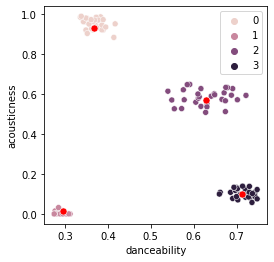

In [123]:
fig, ax=plt.subplots(figsize=(4,4))
sns.scatterplot(data=songs, x='danceability', y='acousticness', hue='cluster')
sns.scatterplot(data=cl_pos, x='danceability', y='acousticness',color='red', s=50)


Text(0.5, 0, 'energy')

<Figure size 432x288 with 0 Axes>

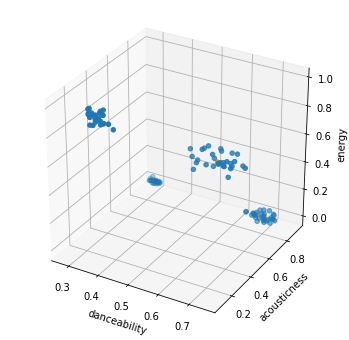

In [124]:
#in 3d picture with certain features
fig = plt.figure()
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
# ax.set_xlim(0, 0.8)
# ax.set_ylim(0, 0.8)
# ax.set_zlim(0, 0.8)

d=songs
ax.scatter(d['danceability'],d['energy'], d['acousticness'])
ax.scatter(cl_pos['danceability'], cl_pos['energy'], cl_pos['acousticness'])

ax.set_xlabel('danceability')
ax.set_ylabel('acousticness')
ax.set_zlabel('energy')